ANÁLISES ESTATÍSTICAS COMPLETAS - DISSERTAÇÃO MESTRADO
Gênero × Sentimento × Complexidade × Resultados Judiciais

📊 CARREGANDO DADOS

Dataset carregado: 756 processos
Colunas disponíveis: 20

Casos válidos - Juiz: 756
Casos válidos - Requerente: 720
Casos válidos - Adv. Requerente: 650
Casos válidos - Adv. Requerido: 618

SEÇÃO 1: ESTATÍSTICAS DESCRITIVAS

DISTRIBUIÇÃO DE GÊNEROS:

Juízes:
genero_juiz
F    457
M    299
Name: count, dtype: int64
  % Feminino: 60.4%
  % Masculino: 39.6%

Requerentes:
genero_requerente
F    370
M    350
Name: count, dtype: int64

Advogados Requerente:
genero_advogado_requerente
M    479
F    171
Name: count, dtype: int64

Advogados Requerido:
genero_advogado_requerido
M    510
F    108
Name: count, dtype: int64

--------------------------------------------------------------------------------

SENTIMENTO DAS SENTENÇAS:
sentimento_sentenca
neutro      660
negativo     92
positivo      4
Name: count, dtype: int64

Score médio: 0.629 (±0.098)

COMPLEXIDADE DA

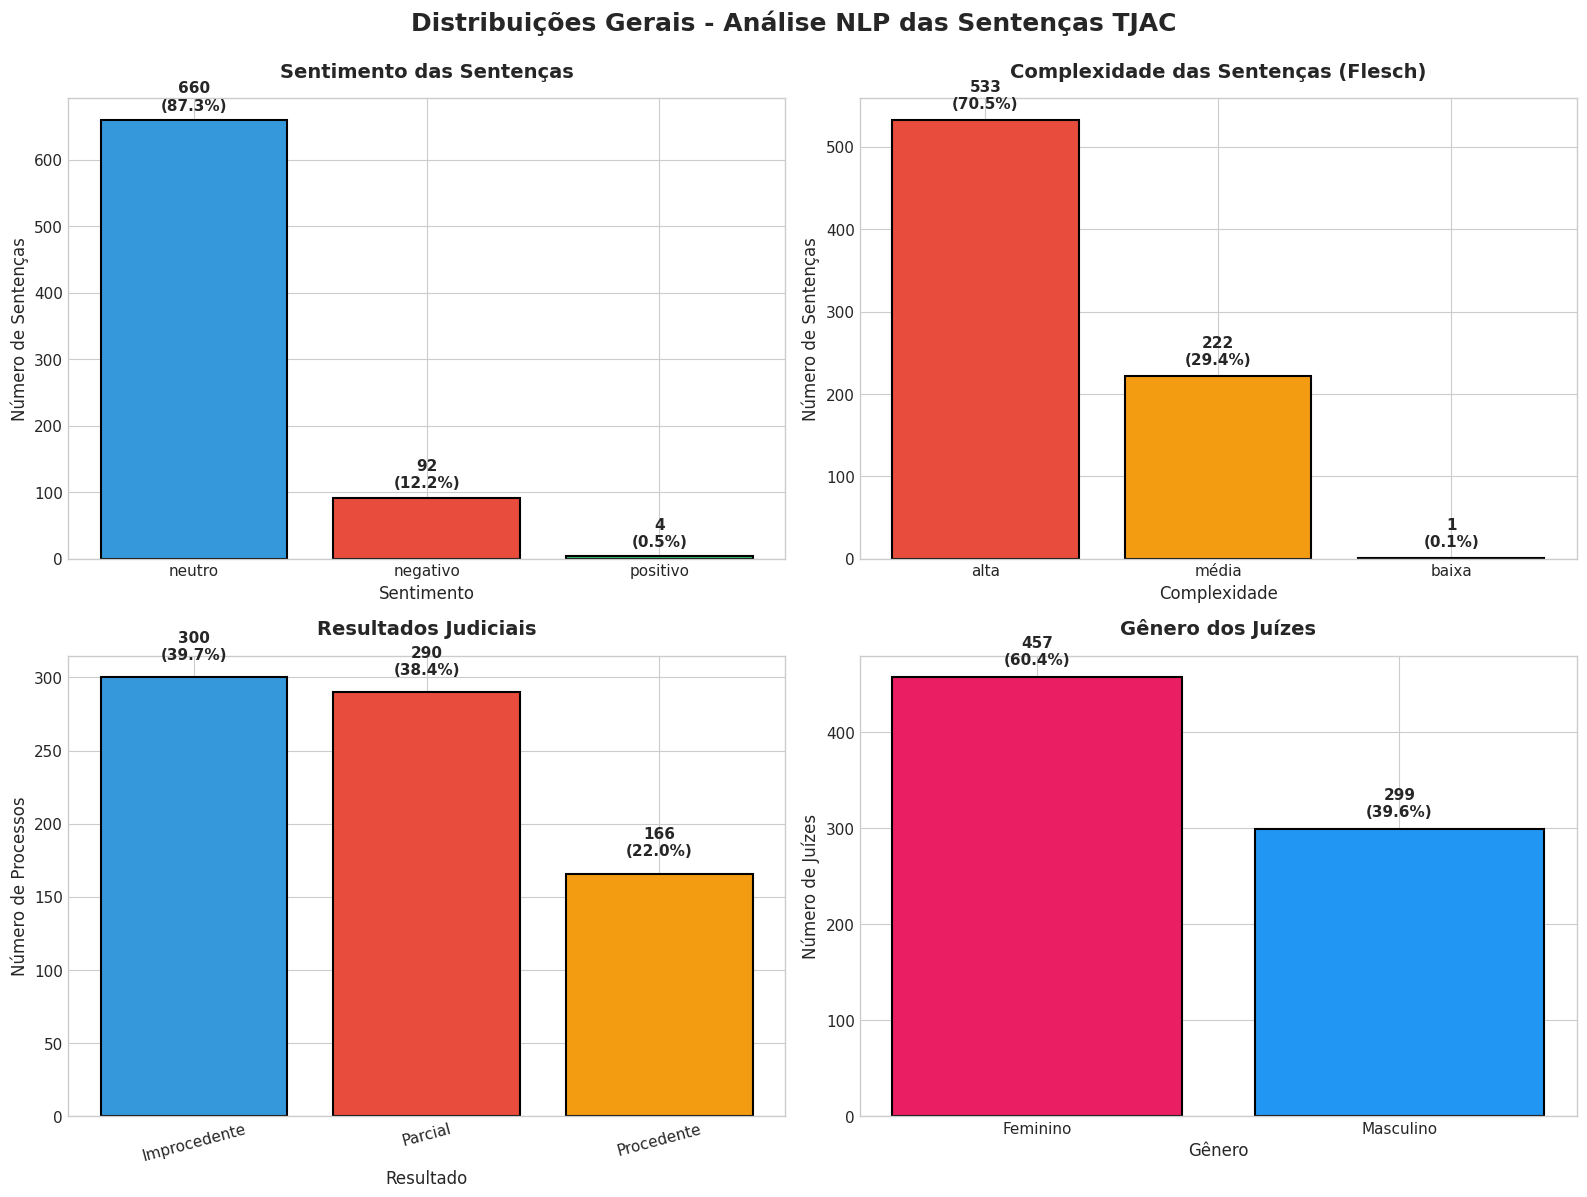

SEÇÃO 3: JUÍZES - Gênero × Sentimento

Contagem absoluta:
sentimento_sentenca  negativo  neutro  positivo
genero_juiz                                    
F                          48     407         2
M                          44     253         2

Percentual por gênero:
sentimento_sentenca  negativo  neutro  positivo
genero_juiz                                    
F                        10.5    89.1       0.4
M                        14.7    84.6       0.7

Teste Chi-quadrado:
  χ² = 3.2270
  p-valor = 0.1992
  Graus de liberdade = 2
NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística


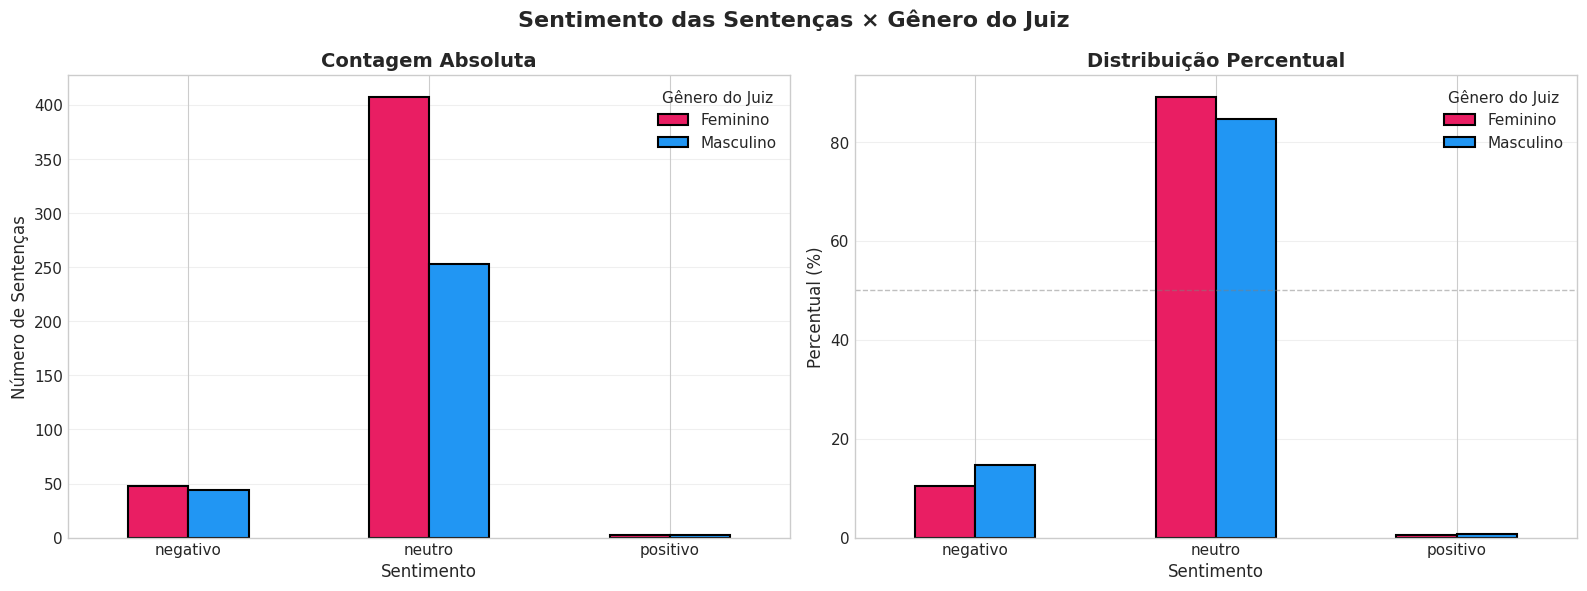

SEÇÃO 4: JUÍZES - Gênero × Complexidade

Contagem absoluta:
complexidade_sentenca  alta  baixa  média
genero_juiz                              
F                       352      1    104
M                       181      0    118

Percentual por gênero:
complexidade_sentenca  alta  baixa  média
genero_juiz                              
F                      77.0    0.2   22.8
M                      60.5    0.0   39.5

Teste Chi-quadrado:
  χ² = 24.8064
  p-valor = 0.0000
  Graus de liberdade = 2
SIGNIFICATIVO (p < 0.05) - Há associação entre gênero e complexidade

Score Flesch médio por gênero:
  Feminino: 19.37 (±17.49)
  Masculino: 28.03 (±16.56)

Teste Mann-Whitney (comparação de scores):
  U = 49388.00
  p-valor = 0.0000
SIGNIFICATIVO - Há diferença nos scores de complexidade


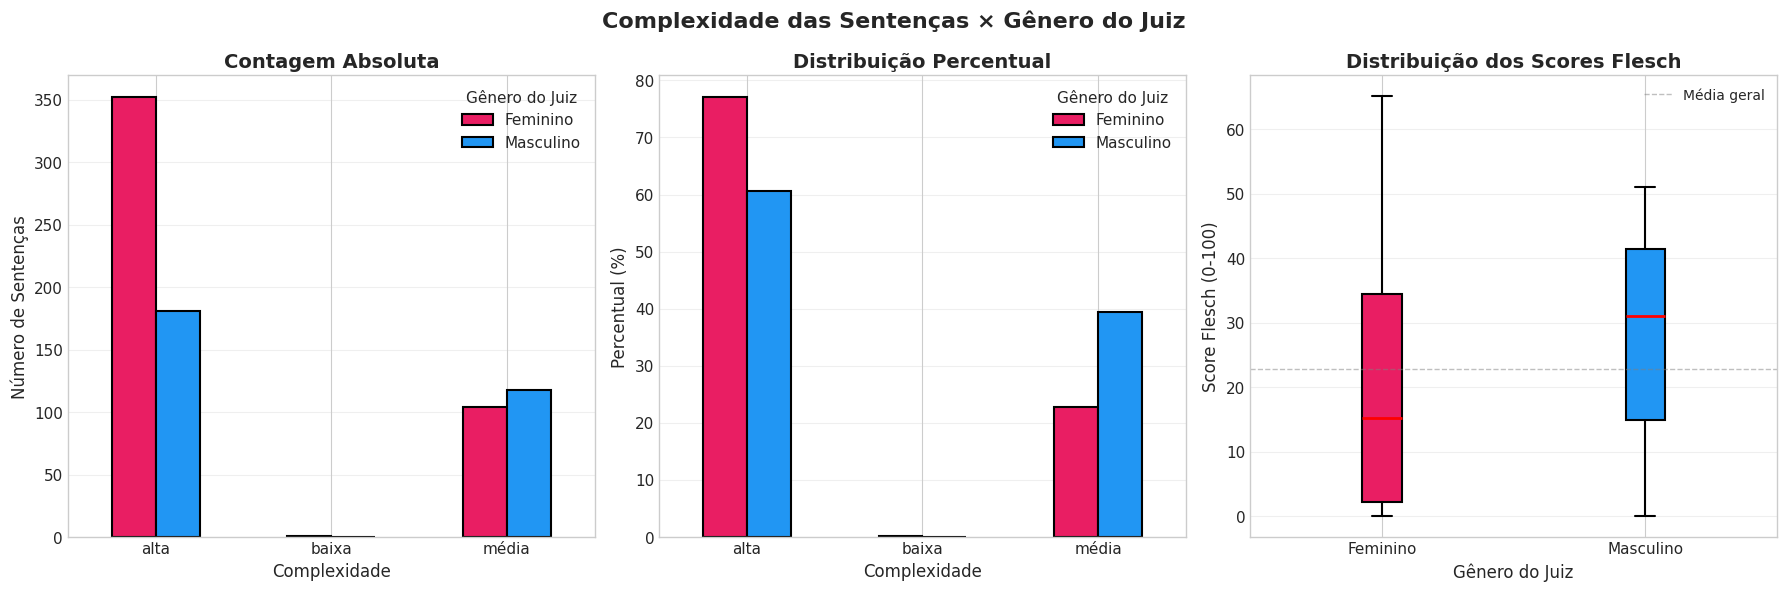


SEÇÃO 5: JUÍZES - Gênero × Resultado Judicial

Contagem absoluta:
resultado_nome  Improcedente  Parcial  Procedente
genero_juiz                                      
F                        186      167         104
M                        114      123          62

Percentual por gênero:
resultado_nome  Improcedente  Parcial  Procedente
genero_juiz                                      
F                       40.7     36.5        22.8
M                       38.1     41.1        20.7

Teste Chi-quadrado:
  χ² = 1.6325
  p-valor = 0.4421
  Graus de liberdade = 2
NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística

Comparação por tipo de resultado:
  Procedente:
    Feminino: 22.8% | Masculino: 20.7% | Diferença: +2.0pp
  Improcedente:
    Feminino: 40.7% | Masculino: 38.1% | Diferença: +2.6pp
  Parcial:
    Feminino: 36.5% | Masculino: 41.1% | Diferença: -4.6pp


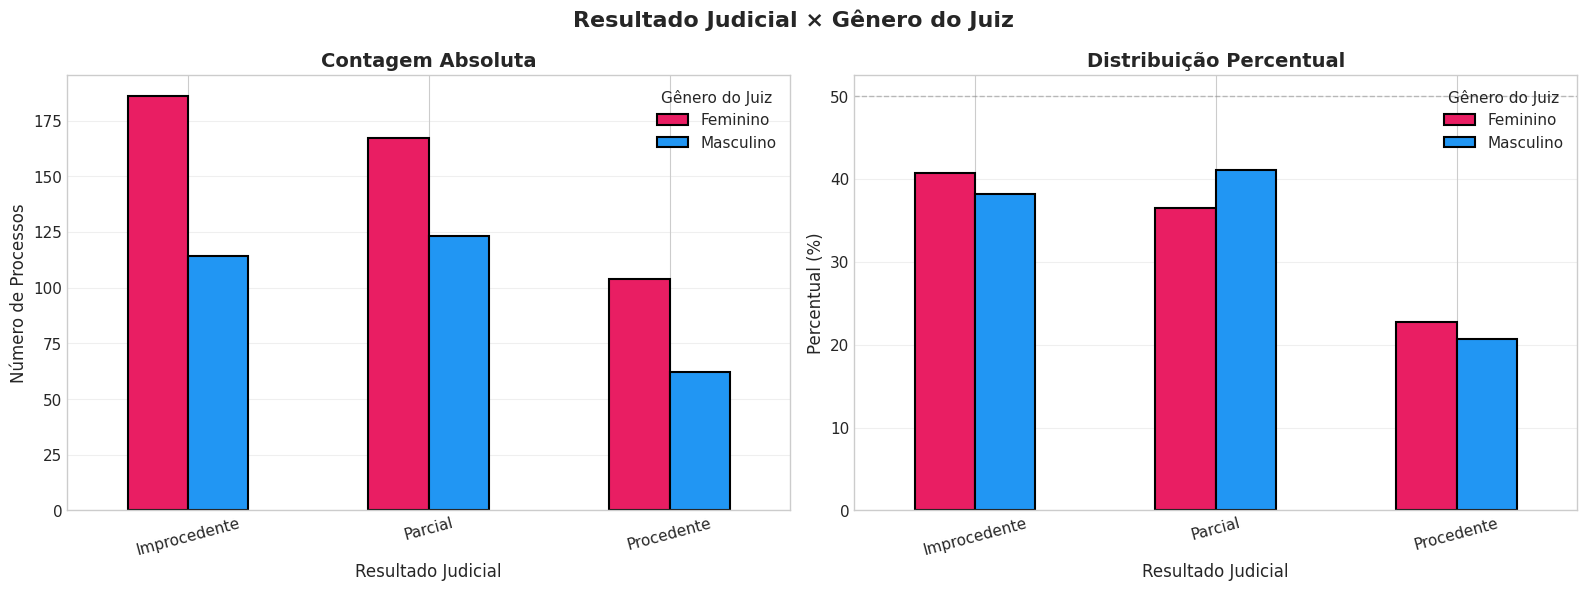


SEÇÃO 6: REQUERENTES - Gênero × Resultado Judicial

Contagem absoluta:
resultado_nome     Improcedente  Parcial  Procedente
genero_requerente                                   
F                           151      150          69
M                           136      127          87

Percentual por gênero:
resultado_nome     Improcedente  Parcial  Procedente
genero_requerente                                   
F                          40.8     40.5        18.6
M                          38.9     36.3        24.9

Teste Chi-quadrado:
  χ² = 4.2183
  p-valor = 0.1213
  Graus de liberdade = 2
NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística

Comparação por tipo de resultado:
  Procedente:
    Feminino: 18.6% | Masculino: 24.9% | Diferença: -6.2pp
  Improcedente:
    Feminino: 40.8% | Masculino: 38.9% | Diferença: +2.0pp
  Parcial:
    Feminino: 40.5% | Masculino: 36.3% | Diferença: +4.3pp


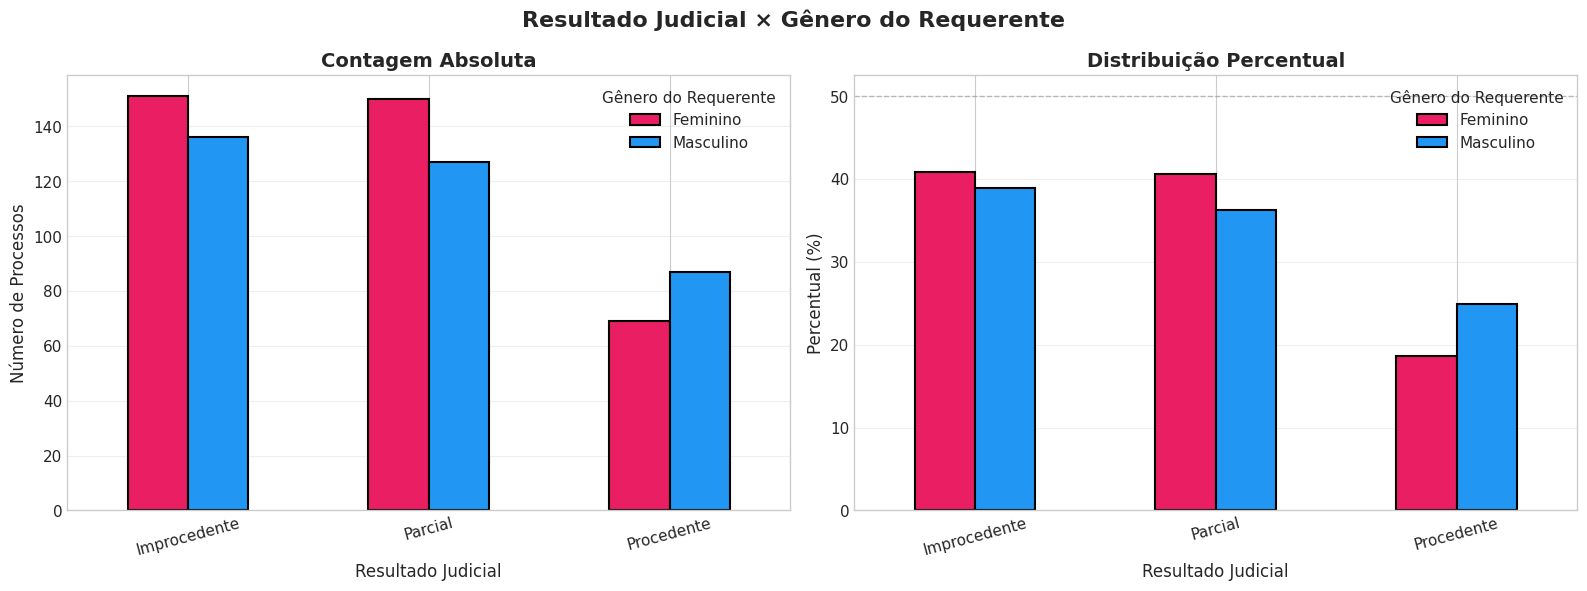


Análises principais concluídas!


In [1]:
"""
analises_estatisticas_nlp_jupyter.py
Análises estatísticas completas com visualizações inline
Análise: Gênero × Sentimento × Complexidade × Resultados
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Configurar para Jupyter
%matplotlib inline

# Configurar visualizações
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("="*80)
print("ANÁLISES ESTATÍSTICAS COMPLETAS - DISSERTAÇÃO MESTRADO")
print("Gênero × Sentimento × Complexidade × Resultados Judiciais")
print("="*80 + "\n")

# ==================== CARREGAR DADOS ====================
print("CARREGANDO DADOS\n")

df = pd.read_csv('processos_tjac_completo_nlp.csv')

print(f"Dataset carregado: {len(df)} processos")
print(f"Colunas disponíveis: {len(df.columns)}\n")

# Mapear resultados
resultado_map = {0: 'Improcedente', 1: 'Procedente', 2: 'Parcial'}
df['resultado_nome'] = df['procedente'].map(resultado_map)

# Dataset completo para diferentes análises
df_juiz = df[
    (df['genero_juiz'].notna()) & 
    (df['sentimento_sentenca'].notna()) &
    (df['complexidade_sentenca'].notna())
].copy()

df_requerente = df[
    (df['genero_requerente'].notna()) & 
    (df['resultado_nome'].notna())
].copy()

df_adv_req = df[
    (df['genero_advogado_requerente'].notna())
].copy()

df_adv_requ = df[
    (df['genero_advogado_requerido'].notna())
].copy()

print(f"Casos válidos - Juiz: {len(df_juiz)}")
print(f"Casos válidos - Requerente: {len(df_requerente)}")
print(f"Casos válidos - Adv. Requerente: {len(df_adv_req)}")
print(f"Casos válidos - Adv. Requerido: {len(df_adv_requ)}\n")

# ==================== SEÇÃO 1: ESTATÍSTICAS DESCRITIVAS ====================
print("="*80)
print("SEÇÃO 1: ESTATÍSTICAS DESCRITIVAS")
print("="*80 + "\n")

print("DISTRIBUIÇÃO DE GÊNEROS:")
print(f"\nJuízes:")
print(df_juiz['genero_juiz'].value_counts())
print(f"  % Feminino: {(df_juiz['genero_juiz']=='F').sum()/len(df_juiz)*100:.1f}%")
print(f"  % Masculino: {(df_juiz['genero_juiz']=='M').sum()/len(df_juiz)*100:.1f}%")

print(f"\nRequerentes:")
print(df_requerente['genero_requerente'].value_counts())

print(f"\nAdvogados Requerente:")
print(df_adv_req['genero_advogado_requerente'].value_counts())

print(f"\nAdvogados Requerido:")
print(df_adv_requ['genero_advogado_requerido'].value_counts())

print("\n" + "-"*80)
print("\nSENTIMENTO DAS SENTENÇAS:")
print(df_juiz['sentimento_sentenca'].value_counts())
print(f"\nScore médio: {df_juiz['sentimento_score'].mean():.3f} (±{df_juiz['sentimento_score'].std():.3f})")

print("\nCOMPLEXIDADE DAS SENTENÇAS:")
print(df_juiz['complexidade_sentenca'].value_counts())
print(f"\nScore Flesch médio: {df_juiz['complexidade_score'].mean():.1f} (±{df_juiz['complexidade_score'].std():.1f})")

print("\nRESULTADOS JUDICIAIS:")
print(df_juiz['resultado_nome'].value_counts())

# ==================== SEÇÃO 2: DISTRIBUIÇÕES GERAIS ====================
print("\n" + "="*80)
print("SEÇÃO 2: DISTRIBUIÇÕES GERAIS")
print("="*80 + "\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuições Gerais - Análise NLP das Sentenças TJAC', fontsize=18, fontweight='bold', y=0.995)

# 2.1 Sentimento
ax1 = axes[0, 0]
sent_counts = df_juiz['sentimento_sentenca'].value_counts()
colors_sent = ['#3498db', '#e74c3c', '#2ecc71']
bars1 = ax1.bar(sent_counts.index, sent_counts.values, color=colors_sent, edgecolor='black', linewidth=1.5)
ax1.set_title('Sentimento das Sentenças', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Número de Sentenças', fontsize=12)
ax1.set_xlabel('Sentimento', fontsize=12)
for i, (bar, v) in enumerate(zip(bars1, sent_counts.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{v}\n({v/len(df_juiz)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2.2 Complexidade
ax2 = axes[0, 1]
comp_counts = df_juiz['complexidade_sentenca'].value_counts().reindex(['alta', 'média', 'baixa'], fill_value=0)
colors_comp = ['#e74c3c', '#f39c12', '#2ecc71']
bars2 = ax2.bar(comp_counts.index, comp_counts.values, color=colors_comp, edgecolor='black', linewidth=1.5)
ax2.set_title('Complexidade das Sentenças (Flesch)', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('Número de Sentenças', fontsize=12)
ax2.set_xlabel('Complexidade', fontsize=12)
for i, (bar, v) in enumerate(zip(bars2, comp_counts.values)):
    if v > 0:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 10,
                 f'{v}\n({v/len(df_juiz)*100:.1f}%)',
                 ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2.3 Resultado Judicial
ax3 = axes[1, 0]
result_counts = df_juiz['resultado_nome'].value_counts()
colors_result = ['#3498db', '#e74c3c', '#f39c12']
bars3 = ax3.bar(result_counts.index, result_counts.values, color=colors_result, edgecolor='black', linewidth=1.5)
ax3.set_title('Resultados Judiciais', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylabel('Número de Processos', fontsize=12)
ax3.set_xlabel('Resultado', fontsize=12)
ax3.tick_params(axis='x', rotation=15)
for i, (bar, v) in enumerate(zip(bars3, result_counts.values)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{v}\n({v/len(df_juiz)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2.4 Gênero do Juiz
ax4 = axes[1, 1]
genero_counts = df_juiz['genero_juiz'].value_counts()
colors_gen = ['#e91e63', '#2196f3']
bars4 = ax4.bar(['Feminino', 'Masculino'], genero_counts.values, color=colors_gen, edgecolor='black', linewidth=1.5)
ax4.set_title('Gênero dos Juízes', fontsize=14, fontweight='bold', pad=15)
ax4.set_ylabel('Número de Juízes', fontsize=12)
ax4.set_xlabel('Gênero', fontsize=12)
for i, (bar, v) in enumerate(zip(bars4, genero_counts.values)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{v}\n({v/len(df_juiz)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# ==================== SEÇÃO 3: JUIZ - GÊNERO × SENTIMENTO ====================
print("="*80)
print("SEÇÃO 3: JUÍZES - Gênero × Sentimento")
print("="*80 + "\n")

# Tabela cruzada
tab_sent_juiz = pd.crosstab(df_juiz['genero_juiz'], df_juiz['sentimento_sentenca'])
print("Contagem absoluta:")
print(tab_sent_juiz)
print()

tab_sent_juiz_pct = pd.crosstab(df_juiz['genero_juiz'], df_juiz['sentimento_sentenca'], normalize='index') * 100
print("Percentual por gênero:")
print(tab_sent_juiz_pct.round(1))
print()

# Teste Chi-quadrado
chi2, p_valor, gl, freq_esp = chi2_contingency(tab_sent_juiz)
print(f"Teste Chi-quadrado:")
print(f"  χ² = {chi2:.4f}")
print(f"  p-valor = {p_valor:.4f}")
print(f"  Graus de liberdade = {gl}")
if p_valor < 0.05:
    print(f"SIGNIFICATIVO (p < 0.05) - Há associação entre gênero e sentimento")
else:
    print(f"NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística")

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Sentimento das Sentenças × Gênero do Juiz', fontsize=16, fontweight='bold')

# Absoluto
ax1 = axes[0]
tab_sent_juiz.T.plot(kind='bar', ax=ax1, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax1.set_title('Contagem Absoluta', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentimento', fontsize=12)
ax1.set_ylabel('Número de Sentenças', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Percentual
ax2 = axes[1]
tab_sent_juiz_pct.T.plot(kind='bar', ax=ax2, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax2.set_title('Distribuição Percentual', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentimento', fontsize=12)
ax2.set_ylabel('Percentual (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# ==================== SEÇÃO 4: JUIZ - GÊNERO × COMPLEXIDADE ====================
print("="*80)
print("SEÇÃO 4: JUÍZES - Gênero × Complexidade")
print("="*80 + "\n")

# Tabela cruzada
tab_comp_juiz = pd.crosstab(df_juiz['genero_juiz'], df_juiz['complexidade_sentenca'])
print("Contagem absoluta:")
print(tab_comp_juiz)
print()

tab_comp_juiz_pct = pd.crosstab(df_juiz['genero_juiz'], df_juiz['complexidade_sentenca'], normalize='index') * 100
print("Percentual por gênero:")
print(tab_comp_juiz_pct.round(1))
print()

# Teste Chi-quadrado
chi2, p_valor, gl, freq_esp = chi2_contingency(tab_comp_juiz)
print(f"Teste Chi-quadrado:")
print(f"  χ² = {chi2:.4f}")
print(f"  p-valor = {p_valor:.4f}")
print(f"  Graus de liberdade = {gl}")
if p_valor < 0.05:
    print(f"SIGNIFICATIVO (p < 0.05) - Há associação entre gênero e complexidade")
else:
    print(f"NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística")

# Comparar scores médios
print(f"\nScore Flesch médio por gênero:")
for genero in ['F', 'M']:
    scores = df_juiz[df_juiz['genero_juiz'] == genero]['complexidade_score']
    print(f"  {'Feminino' if genero == 'F' else 'Masculino'}: {scores.mean():.2f} (±{scores.std():.2f})")

# Teste Mann-Whitney (comparar scores)
scores_f = df_juiz[df_juiz['genero_juiz'] == 'F']['complexidade_score']
scores_m = df_juiz[df_juiz['genero_juiz'] == 'M']['complexidade_score']
u_stat, p_valor_mw = mannwhitneyu(scores_f, scores_m, alternative='two-sided')
print(f"\nTeste Mann-Whitney (comparação de scores):")
print(f"  U = {u_stat:.2f}")
print(f"  p-valor = {p_valor_mw:.4f}")
if p_valor_mw < 0.05:
    print(f"SIGNIFICATIVO - Há diferença nos scores de complexidade")
else:
    print(f"NÃO SIGNIFICATIVO - Scores similares entre gêneros")

# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Complexidade das Sentenças × Gênero do Juiz', fontsize=16, fontweight='bold')

# Absoluto
ax1 = axes[0]
tab_comp_juiz.T.plot(kind='bar', ax=ax1, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax1.set_title('Contagem Absoluta', fontsize=14, fontweight='bold')
ax1.set_xlabel('Complexidade', fontsize=12)
ax1.set_ylabel('Número de Sentenças', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Percentual
ax2 = axes[1]
tab_comp_juiz_pct.T.plot(kind='bar', ax=ax2, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax2.set_title('Distribuição Percentual', fontsize=14, fontweight='bold')
ax2.set_xlabel('Complexidade', fontsize=12)
ax2.set_ylabel('Percentual (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Boxplot de scores
ax3 = axes[2]
data_box = [scores_f, scores_m]
bp = ax3.boxplot(data_box, labels=['Feminino', 'Masculino'], patch_artist=True,
                 medianprops=dict(color='red', linewidth=2),
                 boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                 whiskerprops=dict(color='black', linewidth=1.5),
                 capprops=dict(color='black', linewidth=1.5))
bp['boxes'][0].set_facecolor('#e91e63')
bp['boxes'][1].set_facecolor('#2196f3')
ax3.set_title('Distribuição dos Scores Flesch', fontsize=14, fontweight='bold')
ax3.set_xlabel('Gênero do Juiz', fontsize=12)
ax3.set_ylabel('Score Flesch (0-100)', fontsize=12)
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=df_juiz['complexidade_score'].mean(), color='gray', linestyle='--', alpha=0.5, linewidth=1, label='Média geral')
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

# ==================== SEÇÃO 5: JUIZ - GÊNERO × RESULTADO JUDICIAL ====================
print("\n" + "="*80)
print("SEÇÃO 5: JUÍZES - Gênero × Resultado Judicial")
print("="*80 + "\n")

# Tabela cruzada
tab_result_juiz = pd.crosstab(df_juiz['genero_juiz'], df_juiz['resultado_nome'])
print("Contagem absoluta:")
print(tab_result_juiz)
print()

tab_result_juiz_pct = pd.crosstab(df_juiz['genero_juiz'], df_juiz['resultado_nome'], normalize='index') * 100
print("Percentual por gênero:")
print(tab_result_juiz_pct.round(1))
print()

# Teste Chi-quadrado
chi2, p_valor, gl, freq_esp = chi2_contingency(tab_result_juiz)
print(f"Teste Chi-quadrado:")
print(f"  χ² = {chi2:.4f}")
print(f"  p-valor = {p_valor:.4f}")
print(f"  Graus de liberdade = {gl}")
if p_valor < 0.05:
    print(f"SIGNIFICATIVO (p < 0.05) - Há associação entre gênero do juiz e resultado")
else:
    print(f"NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística")

print(f"\nComparação por tipo de resultado:")
for resultado in ['Procedente', 'Improcedente', 'Parcial']:
    if resultado in tab_result_juiz_pct.columns:
        pct_f = tab_result_juiz_pct.loc['F', resultado]
        pct_m = tab_result_juiz_pct.loc['M', resultado]
        diff = pct_f - pct_m
        print(f"  {resultado}:")
        print(f"    Feminino: {pct_f:.1f}% | Masculino: {pct_m:.1f}% | Diferença: {diff:+.1f}pp")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Resultado Judicial × Gênero do Juiz', fontsize=16, fontweight='bold')

# Absoluto
ax1 = axes[0]
tab_result_juiz.T.plot(kind='bar', ax=ax1, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax1.set_title('Contagem Absoluta', fontsize=14, fontweight='bold')
ax1.set_xlabel('Resultado Judicial', fontsize=12)
ax1.set_ylabel('Número de Processos', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15)
ax1.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Percentual
ax2 = axes[1]
tab_result_juiz_pct.T.plot(kind='bar', ax=ax2, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax2.set_title('Distribuição Percentual', fontsize=14, fontweight='bold')
ax2.set_xlabel('Resultado Judicial', fontsize=12)
ax2.set_ylabel('Percentual (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)
ax2.legend(['Feminino', 'Masculino'], title='Gênero do Juiz', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# ==================== SEÇÃO 6: REQUERENTE - GÊNERO × RESULTADO JUDICIAL ====================
print("\n" + "="*80)
print("SEÇÃO 6: REQUERENTES - Gênero × Resultado Judicial")
print("="*80 + "\n")

# Tabela cruzada
tab_result_req = pd.crosstab(df_requerente['genero_requerente'], df_requerente['resultado_nome'])
print("Contagem absoluta:")
print(tab_result_req)
print()

tab_result_req_pct = pd.crosstab(df_requerente['genero_requerente'], df_requerente['resultado_nome'], normalize='index') * 100
print("Percentual por gênero:")
print(tab_result_req_pct.round(1))
print()

# Teste Chi-quadrado
chi2, p_valor, gl, freq_esp = chi2_contingency(tab_result_req)
print(f"Teste Chi-quadrado:")
print(f"  χ² = {chi2:.4f}")
print(f"  p-valor = {p_valor:.4f}")
print(f"  Graus de liberdade = {gl}")
if p_valor < 0.05:
    print(f"SIGNIFICATIVO (p < 0.05) - Há associação entre gênero do requerente e resultado")
else:
    print(f"NÃO SIGNIFICATIVO (p ≥ 0.05) - Não há associação estatística")

print(f"\nComparação por tipo de resultado:")
for resultado in ['Procedente', 'Improcedente', 'Parcial']:
    if resultado in tab_result_req_pct.columns:
        pct_f = tab_result_req_pct.loc['F', resultado] if 'F' in tab_result_req_pct.index else 0
        pct_m = tab_result_req_pct.loc['M', resultado] if 'M' in tab_result_req_pct.index else 0
        diff = pct_f - pct_m
        print(f"  {resultado}:")
        print(f"    Feminino: {pct_f:.1f}% | Masculino: {pct_m:.1f}% | Diferença: {diff:+.1f}pp")

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Resultado Judicial × Gênero do Requerente', fontsize=16, fontweight='bold')

# Absoluto
ax1 = axes[0]
tab_result_req.T.plot(kind='bar', ax=ax1, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax1.set_title('Contagem Absoluta', fontsize=14, fontweight='bold')
ax1.set_xlabel('Resultado Judicial', fontsize=12)
ax1.set_ylabel('Número de Processos', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15)
ax1.legend(['Feminino', 'Masculino'], title='Gênero do Requerente', fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Percentual
ax2 = axes[1]
tab_result_req_pct.T.plot(kind='bar', ax=ax2, color=['#e91e63', '#2196f3'], edgecolor='black', linewidth=1.5)
ax2.set_title('Distribuição Percentual', fontsize=14, fontweight='bold')
ax2.set_xlabel('Resultado Judicial', fontsize=12)
ax2.set_ylabel('Percentual (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)
ax2.legend(['Feminino', 'Masculino'], title='Gênero do Requerente', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Análises principais concluídas!")
print("="*80)